In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from 'decoded_events.csv'
df_events = pd.read_csv('decoded_events.csv', low_memory=False)

# Filter out rows where 'event' is 'OrderFilled'
df_order_filled = df_events[df_events['event'] == 'OrderFilled']

# Ensure 'takerAmountFilled' is numeric
#df_order_filled['takerAmountFilled'] = pd.to_numeric(df_order_filled['takerAmountFilled'], errors='coerce')

# Group by 'maker' and sum 'takerAmountFilled'
top_traders = df_order_filled.groupby('maker')['takerAmountFilled'].sum().reset_index()

# Remove any entries with NaN values in 'maker' or 'takerAmountFilled'
top_traders = top_traders.dropna(subset=['maker', 'takerAmountFilled'])

# Sort the traders by trade volume in descending order
top_traders = top_traders.sort_values(by='takerAmountFilled', ascending=False)

# Select the top 20 traders
top_20_traders = top_traders.head(20)

# Reset the index for plotting
top_20_traders = top_20_traders.reset_index(drop=True)


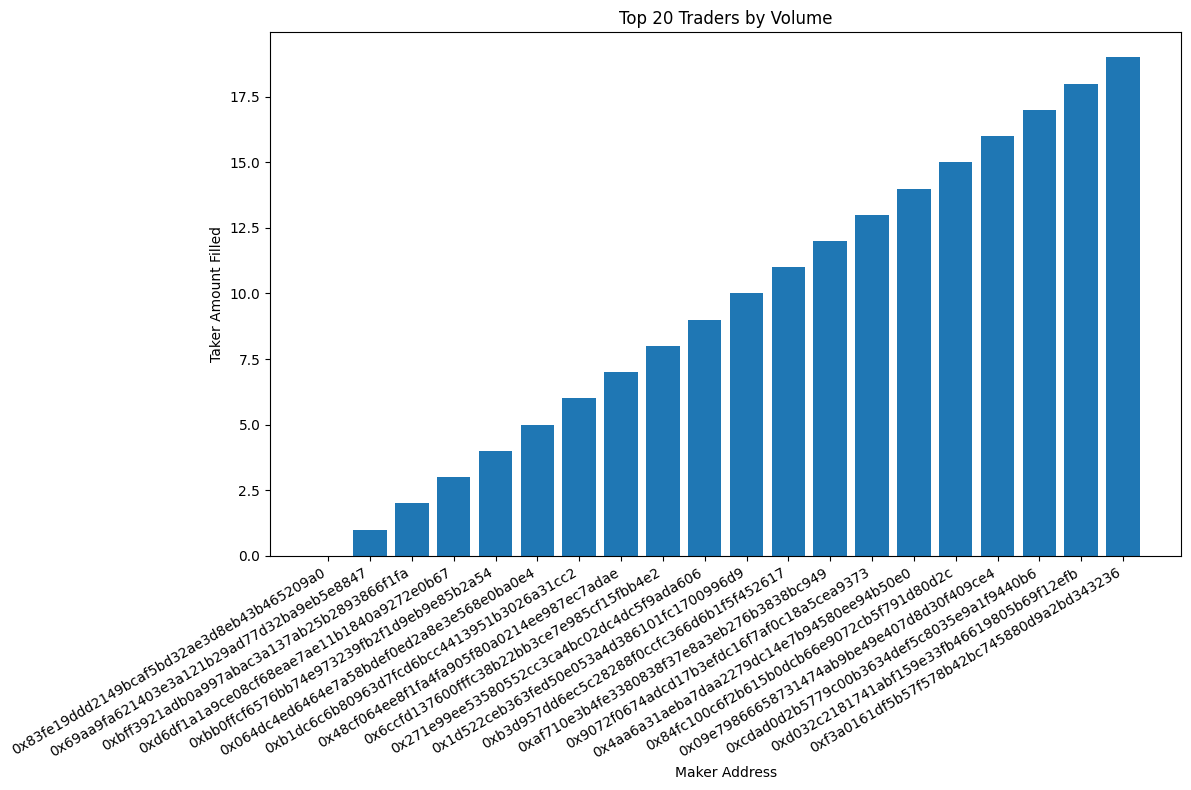

In [24]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Plot the data
plt.bar(top_20_traders['maker'], top_20_traders['takerAmountFilled'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Add labels and title
plt.xlabel('Maker Address')
plt.ylabel('Taker Amount Filled')
plt.title('Top 20 Traders by Volume')

# Optional: Use a logarithmic scale if the data varies greatly
plt.yscale('linear')

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
# Ensure 'takerAmountFilled' is numeric
df_order_filled['takerAmountFilled'] = pd.to_numeric(df_order_filled['takerAmountFilled'], errors='coerce')

# Group by 'maker' and sum 'takerAmountFilled'
top_traders = df_order_filled.groupby('maker')['takerAmountFilled'].sum().reset_index()

# Sort the traders by trade volume in descending order
top_traders = top_traders.sort_values(by='takerAmountFilled', ascending=False)

print("Top Traders by Volume:")
print(top_traders)


Top Traders by Volume:
                                            maker  takerAmountFilled
22084  0x9d84ce0306f8551e02efef1680475fc0f1dc1344       3.802036e+81
8400   0x3cf3e8d5427aed066a7a5926980600f6c3cf87b3       3.224651e+81
29630  0xd42f6a1634a3707e27cbae14ca966068e5d1047d       1.879258e+81
16737  0x7789806c754eb0af4c3abeb026c218b4ba78f823       1.025739e+81
9282   0x43372356634781eea88d61bbdd7824cdce958882       7.680141e+80
...                                           ...                ...
11648  0x534ded73acd8eddf432bc70d353e0f04d605f525       1.953100e+04
13344  0x5fa4142b2e88c037ac3b3640d4e38bc2fd2334a1       1.953100e+04
2227   0x0feeb4d809f164ba48f317573a67742f89232228       1.093700e+04
27557  0xc4c15bd333e57ff16c6b953224cb6f815a1946b6       3.906000e+03
3748   0x1b589a90eaebcfa9dd059e1800f238d46001d05c       4.000000e+01

[35716 rows x 2 columns]


/var/folders/5g/44lbr4md28sc24qvvyvgppqr0000gn/T/ipykernel_6735/1153971373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_filled['takerAmountFilled'] = pd.to_numeric(df_order_filled['takerAmountFilled'], errors='coerce')


In [26]:
# Ensure 'fee' is numeric
df_order_filled['fee'] = pd.to_numeric(df_order_filled['fee'], errors='coerce')

# Calculate total fees collected
total_fees = df_order_filled['fee'].sum()

print("Total Fees Collected:", total_fees)


Total Fees Collected: 4.1734298177996645e+82


/var/folders/5g/44lbr4md28sc24qvvyvgppqr0000gn/T/ipykernel_6735/423844851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_filled['fee'] = pd.to_numeric(df_order_filled['fee'], errors='coerce')


In [27]:
# Count the occurrences of each 'makerAssetId' and 'takerAssetId'
maker_asset_counts = df_order_filled['makerAssetId'].value_counts()
taker_asset_counts = df_order_filled['takerAssetId'].value_counts()

print("Most Frequently Traded Maker Assets:")
print(maker_asset_counts)

print("Most Frequently Traded Taker Assets:")
print(taker_asset_counts)


Most Frequently Traded Maker Assets:
makerAssetId
0                                                                              697590
215050850089914715246899317896622466717702036431948811173231859711991620292      3643
92298297160010275871289053155459354321543024787467487355714124447320193545       3121
305896268500724782277313135066138352578321794750765577629185725351618893762      3022
314323680577196876783101707477839803006607219086380350352362195063908470329      2635
                                                                                ...  
391795374351018429147246703945320413349595396383845850389669479738284891369         1
334951703374766891641209274300169678231611046024244401433421616665461851203         1
267643921400811007693269289579883249666694392648634772800893698694079345885         1
212502812892600208455080017834152993273279897789695643586312823397685181018         1
435811680901422508939439871217615002548536105790955820734004838692167428073         1
Name

In [28]:
event_counts = df_events['event'].value_counts()

print("Event Type Distribution:")
print(event_counts)


Event Type Distribution:
event
OrderFilled        913928
OrdersMatched      374232
TokenRegistered     10934
FeeCharged           4588
NewOperator             7
NewAdmin                1
Name: count, dtype: int64


In [29]:
# Calculate the total volume of the top 20 traders
total_volume_top_20 = top_20_traders['takerAmountFilled'].sum()

# Calculate the percentage contribution of each trader
top_20_traders['percentage'] = (top_20_traders['takerAmountFilled'] / total_volume_top_20) * 100

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_20_traders['percentage'], labels=top_20_traders['maker'], autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title('Trade Volume Distribution Among Top 20 Traders')
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

Number of anomalous entries: 5


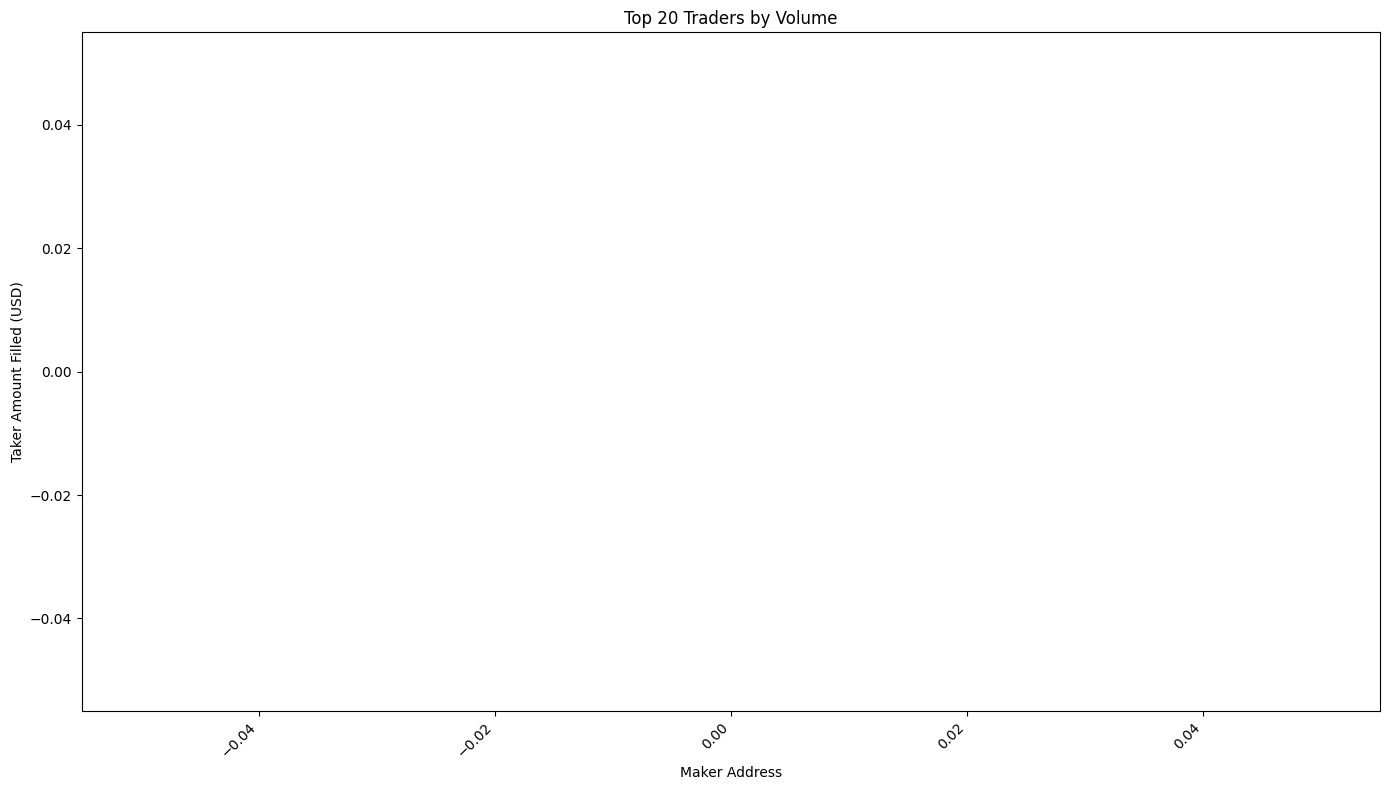

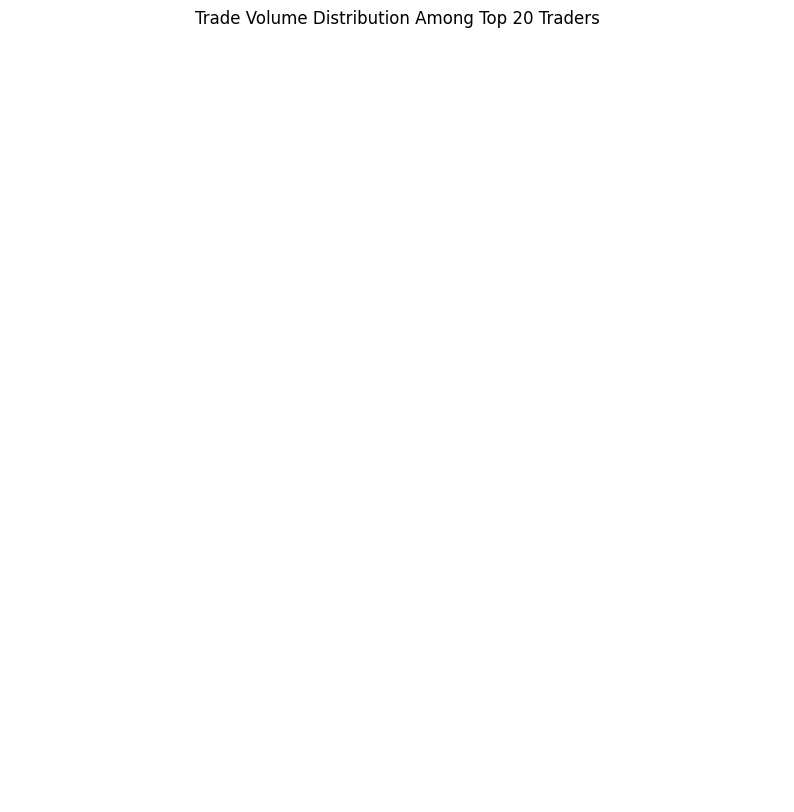

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace this with your actual data loading method)
data = {
    'maker': [
        '0x9d84ce0306f8551e02efef1680475fc0f1dc1344',
        '0x3cf3e8d5427aed066a7a5926980600f6c3cf87b3',
        '0xd42f6a1634a3707e27cbae14ca966068e5d1047d',
        '0x7789806c754eb0af4c3abeb026c218b4ba78f823',
        '0x43372356634781eea88d61bbdd7824cdce958882',
        # Add more entries as needed
    ],
    'takerAmountFilled': [
        '3.802036e+81',
        '3.224651e+81',
        '1.879258e+81',
        '1.025739e+81',
        '7.680141e+80',
        # Add more entries as needed
    ]
}

df_order_filled = pd.DataFrame(data)

# Step 1: Convert 'takerAmountFilled' to numeric
df_order_filled['takerAmountFilled'] = pd.to_numeric(df_order_filled['takerAmountFilled'], errors='coerce')

# Step 2: Drop rows with NaN in 'takerAmountFilled'
df_order_filled = df_order_filled.dropna(subset=['takerAmountFilled'])

# Step 3: Handle anomalously large values
upper_limit = 1e12  # Example upper limit in USD
anomalies = df_order_filled[df_order_filled['takerAmountFilled'] > upper_limit]
print(f"Number of anomalous entries: {len(anomalies)}")
df_order_filled = df_order_filled[df_order_filled['takerAmountFilled'] <= upper_limit]

# Step 4: Group by 'maker' and sum 'takerAmountFilled'
top_traders = df_order_filled.groupby('maker')['takerAmountFilled'].sum().reset_index()

# Step 5: Sort and select top 20
top_traders = top_traders.sort_values(by='takerAmountFilled', ascending=False)
top_20_traders = top_traders.head(20)

# Step 6: Bar Chart Visualization
plt.figure(figsize=(14, 8))
plt.bar(top_20_traders['maker'], top_20_traders['takerAmountFilled'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Maker Address')
plt.ylabel('Taker Amount Filled (USD)')
plt.title('Top 20 Traders by Volume')
plt.tight_layout()
plt.show()

# Step 7: Pie Chart Visualization
total_volume_top_20 = top_20_traders['takerAmountFilled'].sum()
top_20_traders['percentage'] = (top_20_traders['takerAmountFilled'] / total_volume_top_20) * 100

plt.figure(figsize=(10, 10))
plt.pie(
    top_20_traders['percentage'],
    labels=top_20_traders['maker'],
    autopct='%1.1f%%',
    startangle=140
)
plt.axis('equal')
plt.title('Trade Volume Distribution Among Top 20 Traders')
plt.show()
